In [1]:
import os
from collections import defaultdict
import numpy as np

log_dir = './variable-k'
experiment_logs = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(list)))))

for filename in os.listdir(log_dir):
    if filename.endswith('.log'):
        parts = filename.split('-')
        method = '-'.join(parts[0:1])
        experiment_name = '-'.join(parts[1:2])
        if method == "Auncel":
            dataset = '-'.join(parts[2:3])
            k = int('-'.join(parts[3:4]))
            error = float(parts[4:5][0][:-4])
            if dataset == "bert":
                nlist = 128
            else:
                nlist = 1024
        else:
            if method == "ConANN":
                dataset = '-'.join(parts[2:3])
                nlist = '-'.join(parts[3:4])
                # k = int('-'.join(parts[4:5]))
                k = '-'.join(parts[6:8])
                error = float(parts[8:9][0])
            else:
                dataset = '-'.join(parts[4:5])
                nlist = '-'.join(parts[6:7])
                k = '-'.join(parts[7:9])
                error = float(parts[9:10][0][:-4])
                # print(dataset, nlist, k, error)

        with open(os.path.join(log_dir, filename), 'r') as file:
            experiment_logs[experiment_name][method][dataset][k][error] = [float(line.strip()) for line in file.readlines()]

datasets = [j for j in experiment_logs['efficiency']['ConANN'].keys()]
print(datasets)

data = experiment_logs['error']['ConANN']['deep10M']['1-10'][0.1]
average = np.mean(data)
print(average)

['sift1M', 'bert', 'deep10M']
0.1034622865


[np.float64(0.11128093158660844), np.float64(0.10075), np.float64(0.10265)]
[np.float64(0.09353919125), np.float64(0.08885514675), np.float64(0.1034622865)]
[np.float64(0.10546579307860263), np.float64(0.0987724992425), np.float64(0.100407499195)]
[np.float64(0.1074072552975), np.float64(0.08708681662000001), np.float64(0.10094484941250001)]
[np.float64(0.10083769997088791), np.float64(0.10055624970025), np.float64(0.1005194996335)]
[np.float64(0.094677547375), np.float64(0.0870403134875), np.float64(0.100217319715)]


/Users/sfhor/KTH/Projects/conann/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/sfhor/KTH/Projects/conann/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


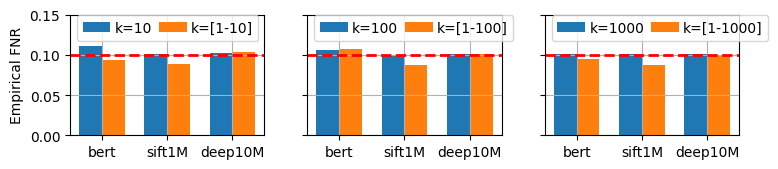

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10})

# Parameters
experiment_name = 'error'
comparisons = [
    ('10-10', '1-10'),
    ('100-100', '1-100'),
    ('1000-1000', '1-1000'),
]
error_value = 0.1
target_datasets = ['bert', 'sift1M', 'deep10M']

# Prepare data structure
data = {dataset: {} for dataset in target_datasets}

# Extract avg values
for k1, k2 in comparisons:
    for k in [k1, k2]:
        for method in experiment_logs[experiment_name]:
            for dataset in experiment_logs[experiment_name][method]:
                if dataset in target_datasets:
                    try:
                        values = experiment_logs[experiment_name][method][dataset][k][error_value]
                        avg_value = np.mean(values)
                        data[dataset][k] = avg_value
                    except KeyError:
                        continue

# Plot
fig, axs = plt.subplots(1, 3, figsize=(8, 1.8), sharey=True)

for ax, (k1, k2) in zip(axs, comparisons):
    x = np.arange(len(target_datasets))
    width = 0.35
    vals1 = [data[ds].get(k1, 0) for ds in target_datasets]
    vals2 = [data[ds].get(k2, 0) for ds in target_datasets]
    print(vals1)
    print(vals2)
    ax.bar(x, vals1, width=width, label=f'k={k1.split('-')[0]}')
    ax.bar(x + width, vals2, width=width, label=f'k=[{k2}]')
    ax.axhline(0.1, color='red', linestyle='--', linewidth=2)
    ax.set_xticks(x + width/2)
    ax.set_xticklabels(target_datasets)
    # ax.set_title(f'{k1} vs {k2}')
    ax.grid(True)
    ax.set_ylim(0, 0.15)
    ax.legend(fontsize=10, loc='upper left', ncols=2, columnspacing=0.5, handletextpad=0.3, bbox_to_anchor=(0, 1.05))



axs[0].set_ylabel('Empirical FNR')

plt.tight_layout()
plt.savefig(f'validity_variablek.png', format='png')
plt.show()


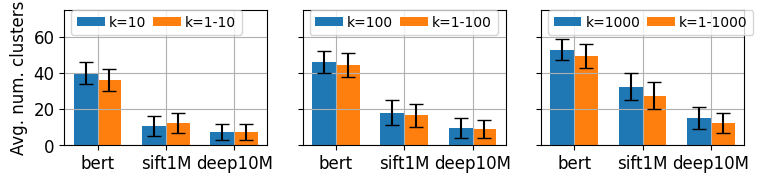

In [182]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})

# Parameters
experiment_name = 'efficiency'
comparisons = [
    ('10-10', '1-10'),
    ('100-100', '1-100'),
    ('1000-1000', '1-1000'),
]
error_value = 0.1
target_datasets = ['bert', 'sift1M', 'deep10M']

# Prepare data structure
data = {dataset: {} for dataset in target_datasets}

# Extract min and max values for range
for k1, k2 in comparisons:
    for k in [k1, k2]:
        for method in experiment_logs[experiment_name]:
            for dataset in experiment_logs[experiment_name][method]:
                if dataset in target_datasets:
                    try:
                        values = experiment_logs[experiment_name][method][dataset][k][error_value]
                        data_min = np.min(values)
                        data_max = np.max(values)
                        data[dataset][k] = (data_min, data_max)
                    except KeyError:
                        continue

# Plot
fig, axs = plt.subplots(1, 3, figsize=(8, 2), sharey=True)

for ax, (k1, k2) in zip(axs, comparisons):
    x = np.arange(len(target_datasets))
    width = 0.35

    vals1_min = [data[ds].get(k1, (0,0))[0] for ds in target_datasets]
    vals1_max = [data[ds].get(k1, (0,0))[1] for ds in target_datasets]
    vals1_avg = [(mn + mx) / 2 for mn, mx in zip(vals1_min, vals1_max)]
    errs1 = [(mx - mn) / 2 for mn, mx in zip(vals1_min, vals1_max)]

    vals2_min = [data[ds].get(k2, (0,0))[0] for ds in target_datasets]
    vals2_max = [data[ds].get(k2, (0,0))[1] for ds in target_datasets]
    vals2_avg = [(mn + mx) / 2 for mn, mx in zip(vals2_min, vals2_max)]
    errs2 = [(mx - mn) / 2 for mn, mx in zip(vals2_min, vals2_max)]

    ax.bar(x, vals1_avg, width=width, yerr=errs1, capsize=5, label=f'k={k1.split("-")[0]}')
    ax.bar(x + width, vals2_avg, width=width, yerr=errs2, capsize=5, label=f'k={k2}')

    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(target_datasets)
    ax.grid(True)
    ax.set_ylim(0, 75)
    ax.legend(fontsize=10, loc='upper left', ncols=2, columnspacing=0.5,
              handletextpad=0.3, bbox_to_anchor=(0, 1.05))

axs[0].set_ylabel('Avg. num. clusters')
plt.tight_layout()
plt.savefig(f'efficiency_variablek.png', format='png')
plt.show()


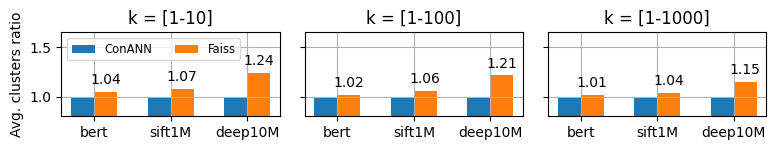

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10}) 

# Parameters to filter
experiment_name = 'efficiency'
k_values = ['1-10', '1-100', '1-1000']
error_values = [0.1, ]  # List of error values
target_datasets = ['bert', 'sift1M', 'deep10M']

# Data storage
clusters_ratio_per_method = {dataset: [] for dataset in target_datasets}
methods = ['ConANN', 'Faiss']

# Create the figure and axes for subplots
fig, axes = plt.subplots(1, len(k_values), figsize=(8, 1.6), sharey=True)

# Loop through each error value and create a subplot
for idx, k_value in enumerate(k_values):
    error_value = error_values[0]
    ax = axes[idx]
    clusters_ratio_per_method = {dataset: [] for dataset in target_datasets}

    # Extract data for the ratio computation
    for target_dataset in target_datasets:
        data = {}
        conann_avg = None 
        for method in experiment_logs[experiment_name]:
            for dataset in experiment_logs[experiment_name][method]:
                if dataset == target_dataset:
                    try:
                        values = experiment_logs[experiment_name][method][dataset][k_value][error_value]
                        if method == 'ConANN':
                            count_minus_one = values.count(-1)
                            values = [v for v in values if v != -1]
                            # print("Abstention rate ConANN:", count_minus_one)
                        data[method] = np.sort(values)
                        if dataset == "gist" and method == 'ConANN':
                            print(error_value, np.mean(data[method]))
                    except KeyError:
                        continue
        
        if 'ConANN' in data:
            conann_avg = np.mean(data['ConANN'])
        for method in methods:
            if method in data and conann_avg is not None:
                avg_clusters = np.mean(data[method])
                # Compute ratio relative to the ConANN baseline
                ratio = avg_clusters / conann_avg
                clusters_ratio_per_method[target_dataset].append(ratio)

    bar_width = 0.3
    index = np.arange(len(target_datasets))
    for i, method in enumerate(methods):
        bars = ax.bar(index + i * bar_width, 
                      [clusters_ratio_per_method[dataset][i] for dataset in target_datasets],
                      bar_width, label=method)

        if method == 'Faiss':
            for j, bar in enumerate(bars):
                ratio_value = clusters_ratio_per_method[target_datasets[j]][i]
                ax.text(bar.get_x() + bar.get_width() / 2, 
                        bar.get_height() + 0.05,  
                        f'{ratio_value:.2f}',  
                        ha='center', va='bottom', fontsize=10)

    # Add labels and title for each subplot
    ax.set_title(f'k = [{k_value}]')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(target_datasets)
    ax.grid(True)
    ax.set_ylim(0.8, 1.65)

axes[0].set_ylabel('Avg. clusters ratio')
axes[0].legend(fontsize='small', loc='upper left', ncol=2)

plt.tight_layout()
plt.savefig(f'efficiency_variablek_faiss.png', format='png')
plt.show()
